In [1]:
# Import data and perform processing 
import os as os 

In [2]:
# import the relevent package
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

# setting the working directory

In [3]:
os.chdir('C:\\Users\\MyPC\\Desktop\\Project 8 log. regre. (Py.)')

In [4]:
os.getcwd()

'C:\\Users\\MyPC\\Desktop\\Project 8 log. regre. (Py.)'

In [5]:
os.listdir()

['Credit_Risk_Test_data.csv',
 'Credit_Risk_Train_data.csv',
 'Credit_Risk_Validate_data.csv',
 'R_Module_Day_7.1_Case Study on Credit Risk.docx']

In [6]:
# read the dataset
cr_train = pd.read_csv('Credit_Risk_Train_data.csv')

cr_test = pd.read_csv('Credit_Risk_Test_data.csv')

cr_valid = pd.read_csv('Credit_Risk_Validate_data.csv')

In [7]:
# check the dimension of the datset
print("Dimension of the training data",cr_train.shape)
print("Dimension of the validation data",cr_valid.shape)
print("Dimension of the testing data",cr_test.shape)

Dimension of the training data (614, 13)
Dimension of the validation data (367, 13)
Dimension of the testing data (367, 12)


In [8]:
cr_train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
cr_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
cr_valid.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'outcome'],
      dtype='object')

Here cr_train has last Loan_stauts column and cr_valid has last Outcome column so we have to change this outcome column
into Loan_status.

We are doing logistic regression to find out-
Probability of the observations belonging to the difault class.

In [11]:
cr_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
cr_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  outcome            367 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 37.4+ KB


In [13]:
# Rename the column outcome to loan_status
cr_valid.rename(columns={"outcome":"Loan_Status"},inplace=True)

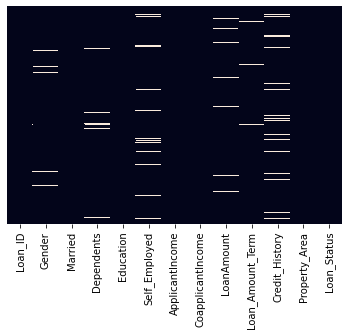

In [14]:
# using heatmap to figure out missing data if any
sns.heatmap(cr_train.isnull(),yticklabels=False,cbar=False)

In [15]:
cr_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
# we are going to look at the frequency of the Gender column and we are trying to figure out which is the modal class
cr_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [17]:
cr_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [18]:
cr_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [19]:
cr_train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [20]:
cr_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [21]:
cr_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [22]:
# Imputation of categorical variables for training data
cr_train['Gender'].fillna('Male',inplace=True)

cr_train['Married'].fillna('Yes',inplace=True)

cr_train['Dependents'].fillna('0',inplace=True)

cr_train['Education'].fillna('Graduate',inplace=True)

cr_train['Self_Employed'].fillna('No',inplace=True)

cr_train['Credit_History'].fillna(1,inplace=True)


In [23]:
# summing up all the null values in each column/variable
cr_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

LoanAmount and Loan_Amount_Term these two numeric columns has missing values so we are replacing the missing values with 
central value and most appropriate central value is median, whether the data is skewed or not skewed median is always the 
best central value.

In [24]:
# compute the median value for loan amount 
np.nanmedian(cr_train['LoanAmount'])

128.0

In [25]:
# compute the median value for loan amount term
np.nanmedian(cr_train['Loan_Amount_Term'])

360.0

In [26]:
# Imputation for Loan amount and loan amount term

cr_train['LoanAmount'].fillna(128.0,inplace=True)

cr_train['Loan_Amount_Term'].fillna(360.0,inplace=True)


In [27]:
# creating the dummy variable and dropping the old column
cr_train_dummy_cod = pd.get_dummies(cr_train.drop(['Loan_ID'],axis=1),drop_first=True)


In [28]:
cr_train_dummy_cod.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender_Male              614 non-null    uint8  
 6   Married_Yes              614 non-null    uint8  
 7   Dependents_1             614 non-null    uint8  
 8   Dependents_2             614 non-null    uint8  
 9   Dependents_3+            614 non-null    uint8  
 10  Education_Not Graduate   614 non-null    uint8  
 11  Self_Employed_Yes        614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
 13  Property_Area_Urban      614 non-null    uint8  
 14  Loan_Status_Y            6

In [29]:
cr_train_dummy_cod.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


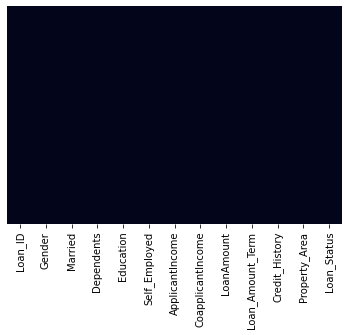

In [30]:
sns.heatmap(cr_train.isnull(), yticklabels=False, cbar=False)

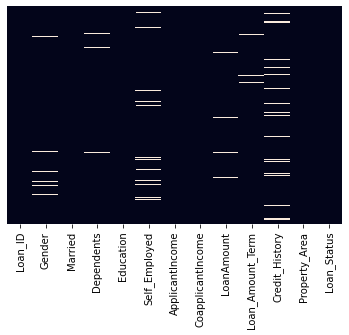

In [31]:
# using heatmap to figure out missing data if any
sns.heatmap(cr_valid.isnull(),yticklabels=False,cbar=False)

In [32]:
# Imputation of categorical variables for valid data
cr_valid['Gender'].fillna('Male',inplace=True)

cr_valid['Married'].fillna('Yes',inplace=True)

cr_valid['Dependents'].fillna('0',inplace=True)

cr_valid['Education'].fillna('Graduate',inplace=True)

cr_valid['Self_Employed'].fillna('No',inplace=True)

cr_valid['Credit_History'].fillna(1,inplace=True)

In [33]:
# summing up all the missing values in each column
cr_valid.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
# compute the median value for loan amount
np.nanmedian(cr_valid['LoanAmount'])

125.0

In [35]:
# compute the median value for loan amount term
np.nanmedian(cr_valid['Loan_Amount_Term'])

360.0

In [36]:
# Imputation for loan amount and loan amount term
cr_valid['LoanAmount'].fillna(125.0,inplace=True)

cr_valid['Loan_Amount_Term'].fillna(360.0,inplace=True)

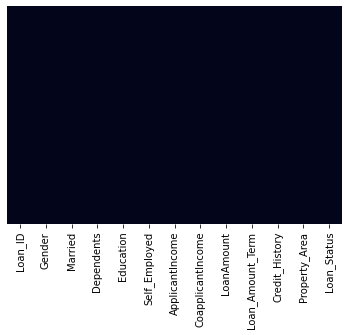

In [37]:
# using heatmap to figure out missing data if any
sns.heatmap(cr_valid.isnull(),yticklabels=False,cbar=False)

In [38]:
cr_valid_dummy_cod = pd.get_dummies(cr_valid.drop(['Loan_ID'],axis=1),drop_first=True)
cr_valid_dummy_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          367 non-null    int64  
 1   CoapplicantIncome        367 non-null    int64  
 2   LoanAmount               367 non-null    float64
 3   Loan_Amount_Term         367 non-null    float64
 4   Credit_History           367 non-null    float64
 5   Gender_Male              367 non-null    uint8  
 6   Married_Yes              367 non-null    uint8  
 7   Dependents_1             367 non-null    uint8  
 8   Dependents_2             367 non-null    uint8  
 9   Dependents_3+            367 non-null    uint8  
 10  Education_Not Graduate   367 non-null    uint8  
 11  Self_Employed_Yes        367 non-null    uint8  
 12  Property_Area_Semiurban  367 non-null    uint8  
 13  Property_Area_Urban      367 non-null    uint8  
 14  Loan_Status_Y            3

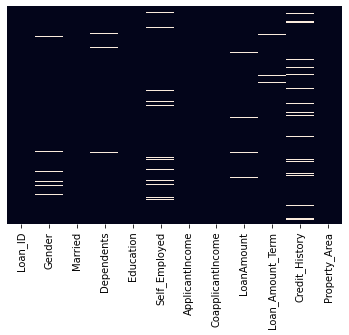

In [39]:
# using heatmap to figure out missing data if any
sns.heatmap(cr_test.isnull(),yticklabels=False,cbar=False)

In [40]:
# Imputation of categorical variables for test data
cr_test['Gender'].fillna('Male',inplace=True)

cr_test['Married'].fillna('Yes',inplace=True)

cr_test['Dependents'].fillna('0',inplace=True)

cr_test['Education'].fillna('Graduate',inplace=True)

cr_test['Self_Employed'].fillna('No',inplace=True)

cr_test['Credit_History'].fillna(1,inplace=True)

In [41]:
cr_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [42]:
# compute the median value for loan amount
np.nanmedian(cr_test['LoanAmount'])

125.0

In [43]:
# compute the median value for loan amount term
np.nanmedian(cr_test['Loan_Amount_Term'])

360.0

In [44]:
# Imputation for loan amount and loan amount term
cr_test['LoanAmount'].fillna(125.0,inplace=True)

cr_test['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [45]:
cr_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

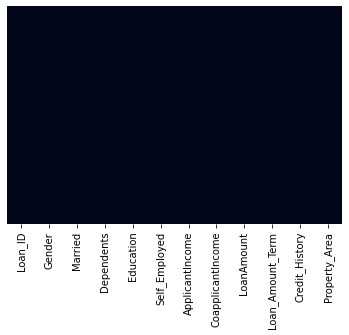

In [46]:
# using heatmap to figure out missing data if any
sns.heatmap(cr_test.isnull(),yticklabels=False,cbar=False)

In [47]:
cr_test_dummy_cod = pd.get_dummies(cr_test.drop(['Loan_ID'],axis=1),drop_first=True)


In [48]:
cr_test_dummy_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          367 non-null    int64  
 1   CoapplicantIncome        367 non-null    int64  
 2   LoanAmount               367 non-null    float64
 3   Loan_Amount_Term         367 non-null    float64
 4   Credit_History           367 non-null    float64
 5   Gender_Male              367 non-null    uint8  
 6   Married_Yes              367 non-null    uint8  
 7   Dependents_1             367 non-null    uint8  
 8   Dependents_2             367 non-null    uint8  
 9   Dependents_3+            367 non-null    uint8  
 10  Education_Not Graduate   367 non-null    uint8  
 11  Self_Employed_Yes        367 non-null    uint8  
 12  Property_Area_Semiurban  367 non-null    uint8  
 13  Property_Area_Urban      367 non-null    uint8  
dtypes: float64(3), int64(2), u

In [49]:
# Putting the validation data Target variable in a new object "valid_loan_Status"
valid_Loan_Status = cr_valid_dummy_cod['Loan_Status_Y']
valid_Loan_Status.value_counts()


1    290
0     77
Name: Loan_Status_Y, dtype: int64

In [50]:
# Dropping the column from the validation dataset
del cr_valid_dummy_cod['Loan_Status_Y']

In [51]:
cr_valid_dummy_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          367 non-null    int64  
 1   CoapplicantIncome        367 non-null    int64  
 2   LoanAmount               367 non-null    float64
 3   Loan_Amount_Term         367 non-null    float64
 4   Credit_History           367 non-null    float64
 5   Gender_Male              367 non-null    uint8  
 6   Married_Yes              367 non-null    uint8  
 7   Dependents_1             367 non-null    uint8  
 8   Dependents_2             367 non-null    uint8  
 9   Dependents_3+            367 non-null    uint8  
 10  Education_Not Graduate   367 non-null    uint8  
 11  Self_Employed_Yes        367 non-null    uint8  
 12  Property_Area_Semiurban  367 non-null    uint8  
 13  Property_Area_Urban      367 non-null    uint8  
dtypes: float64(3), int64(2), u

In [52]:
# Descriptive Statistics

In [53]:
x = cr_train['ApplicantIncome'] 

In [54]:
y = cr_train['LoanAmount'] 


Text(0, 0.5, 'Loan Amount')

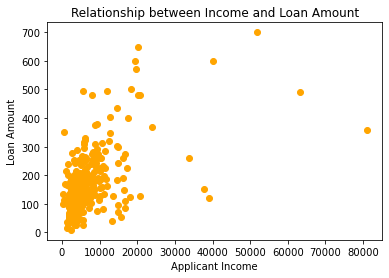

In [55]:
# check the relationship between the Income and Loan amount using a scatter plot
plt.scatter(x,y,color="orange")

plt.title("Relationship between Income and Loan Amount")

plt.xlabel("Applicant Income")

plt.ylabel("Loan Amount")

It is positive relationship between applicant income and loan amount.

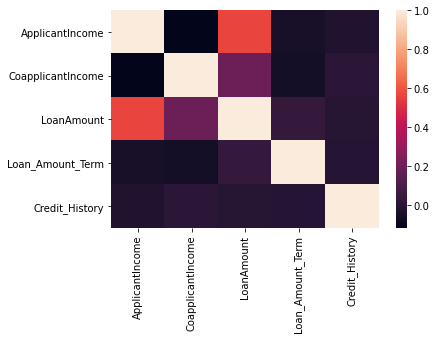

In [56]:
# checking correlation between diff variables
sns.heatmap(cr_train.corr())


In [57]:
# checking correlation between diff variables
cr_train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


In [58]:
# frequency table
cr_train['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

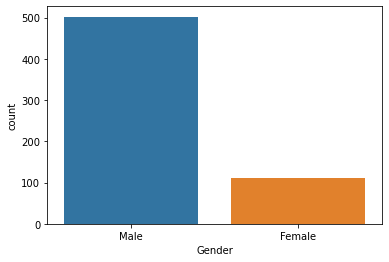

In [59]:
# do a count check for the categorical variable
sns.countplot(x="Gender",data=cr_train)
plt.show()

In [60]:
# frequency table
cr_train['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

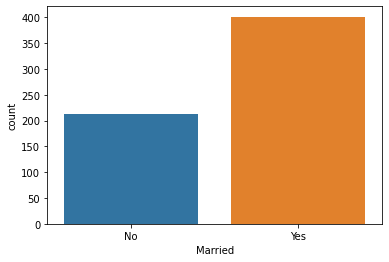

In [61]:
# do a count check for the categorical variable(Married)
sns.countplot(x="Married",data=cr_train)
plt.show()

In [62]:
# frequency table
cr_train['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

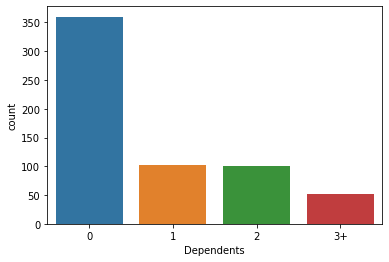

In [63]:
# do a count check for the categorical variable(Dependents)
sns.countplot(x="Dependents",data=cr_train)
plt.show()

In [64]:
# Central Tendency of income (Numeric variables)
cr_train['ApplicantIncome'].median()

3812.5

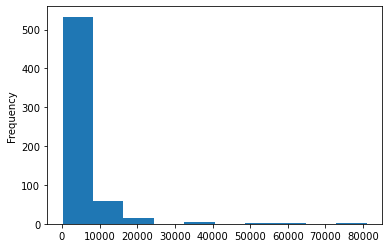

In [65]:
# histogram of the applicant income in the training dataset
cr_train['ApplicantIncome'].plot.hist()

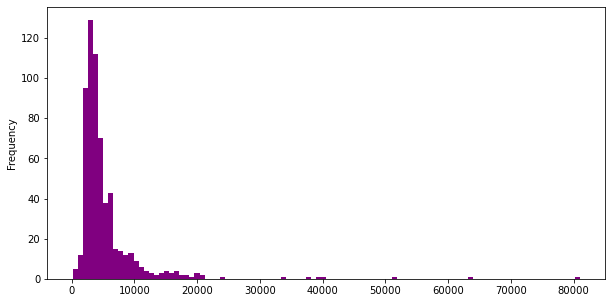

In [66]:
# effect of increasing the bin size
# skeweness evident
cr_train['ApplicantIncome'].plot.hist(bins=100,figsize=(10,5),color="purple")

In [67]:
# Crosstabulating the Gender and the loan status
pd.crosstab(cr_train['Gender'],cr_train['Loan_Status'])



Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


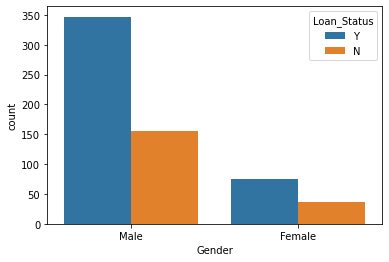

In [68]:
# Gender vs Loan approval status
sns.countplot(x="Gender",hue="Loan_Status",data=cr_train)


In [69]:
# Crosstabulating the Dependents and the Loan Status
pd.crosstab(cr_train['Dependents'],cr_train['Loan_Status'])

Loan_Status,N,Y
Dependents,,
0,113,247
1,36,66
2,25,76
3+,18,33


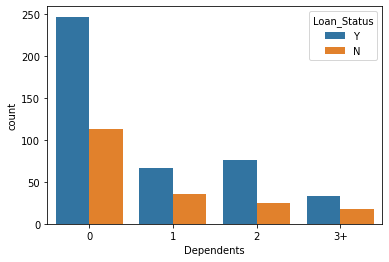

In [70]:
# Dependents vs Loan status
sns.countplot(x="Dependents",hue="Loan_Status",data=cr_train)


In [71]:
# Crosstabulating the Education and the Loan status
pd.crosstab(cr_train['Education'],cr_train['Loan_Status'])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [72]:
# Crosstabulating the credit history and the loan status
pd.crosstab(cr_train['Credit_History'],cr_train['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,110,415


In [73]:
# Crosstabulating the employment type and the Loan status
pd.crosstab(cr_train['Self_Employed'],cr_train['Loan_Status'])

Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56


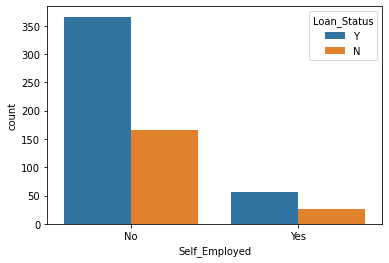

In [74]:
# self_employed vs loan status
sns.countplot(x="Self_Employed",hue="Loan_Status",data=cr_train)


In [75]:
# Crosstabulating the property area and the Loan status
pd.crosstab(cr_train['Property_Area'],cr_train['Loan_Status'])

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


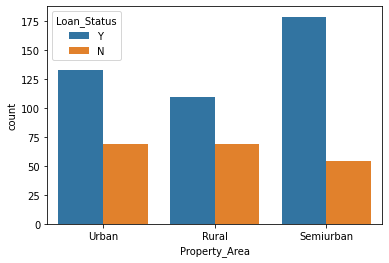

In [76]:
# property area vs loan status
sns.countplot(x="Property_Area",hue="Loan_Status",data=cr_train)


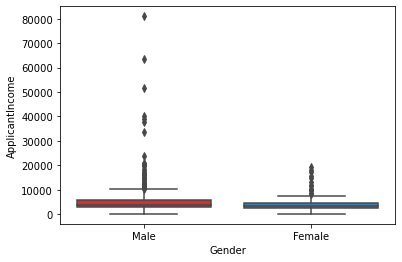

In [81]:
sns.boxplot(x="Gender",y="ApplicantIncome",data=cr_train,palette="Set1")


In [82]:
# Creating the logistic regression Model
cr_train_dummy_cod.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [83]:
# Segregating the input and the output varaible by dropping the loan status columnj from the cr_training dummy dataset
cr_train_inp= cr_train_dummy_cod.drop(['Loan_Status_Y'],axis=1)

cr_train_out= cr_train_dummy_cod['Loan_Status_Y']

In [85]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_reg.fit(cr_train_inp,cr_train_out) 

LogisticRegression()

In [86]:
cr_train_dummy_cod.shape

(614, 15)

In [87]:
cr_valid_dummy_cod.shape

(367, 14)

In [88]:
cr_train_dummy_cod.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [89]:
cr_test_dummy_cod.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [100]:
prediction_test= log_reg.predict(cr_test_dummy_cod)
prediction_test


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [94]:
prediction = log_reg.predict(cr_valid_dummy_cod)
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [91]:
# Model Evaluation using performance measures
from sklearn.metrics import classification_report

In [93]:
# performance measures/ratios
classification_report(valid_Loan_Status,prediction)


'              precision    recall  f1-score   support\n\n           0       0.95      0.74      0.83        77\n           1       0.93      0.99      0.96       290\n\n    accuracy                           0.94       367\n   macro avg       0.94      0.86      0.90       367\nweighted avg       0.94      0.94      0.93       367\n'

Precision is the current prediction out of the total positive prediction (True positive+ False positive).
Precision is also known as the Positive predictive value.

recall means how many individuals where classified correcly out of the actual positive individuals. The other name of recall
is Ture Positive Ratio or Sensitivity.

In [95]:
# confusion matrix
from sklearn.metrics import confusion_matrix

In [96]:
confusion_matrix(valid_Loan_Status,prediction)


array([[ 57,  20],
       [  3, 287]], dtype=int64)

In [97]:
# Reporting the final accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(valid_Loan_Status,prediction)*100

93.73297002724796

In [101]:
# Add a column for the predicted class in the test dataset
cr_test['Predictions']=prediction_test


In [102]:
cr_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predictions
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1
